## Algorytm Genetyczny

In [11]:
def tworzenie_populacji(rozmiar_populacji):
    print(rozmiar_populacji)

In [13]:
rozmiar_populacji = 10

In [12]:
populacja = tworzenie_populacji(rozmiar_populacji)

10


[24, 22, 18, 22, 2, 10, 19, 11, 27, 15, 21, 7, 20, 21, 7, 22, 1, 13, 15, 8, 21, 23, 24, 17, 26, 19, 10, 23, 15, 26, 11, 4, 7, 22, 17, 6, 25, 20, 24, 22]
10110 3
10100
01111 1
00111
01111 0
11111
01111 3
01101
01111 0
11111
01111 0
11111
01111 2
01011
01111 2
01011
01111 1
00111
01111 2
01011
01111 1
00111
01111 1
00111
01111 4
01110
01111 0
11111
01111 1
00111
01111 3
01101
01110 4
01111
01111 3
01101
01110 2
01010
01110 0
11110
01111 1
00111
[10, 7, 15, 10, 10, 7, 7, 7, 7, 10, 7, 11, 10, 7, 7, 15, 15, 7, 11, 15, 10, 7, 7, 15, 7, 11, 15, 15, 7, 7, 7, 11, 15, 7, 7, 10, 10, 15, 15, 7]
time elapsed: 0.02800130844116211
15
mutacji 21


C:\Users\maszy\AppData\Local\Temp\ipykernel_7572\1064884438.py:123: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)
C:\Users\maszy\AppData\Local\Temp\ipykernel_7572\1064884438.py:129: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)
C:\Users\maszy\AppData\Local\Temp\ipykernel_7572\1064884438.py:135: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)
C:\Users\maszy\AppData\Local\Temp\ipykernel_7572\1064884438.py:141: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped t

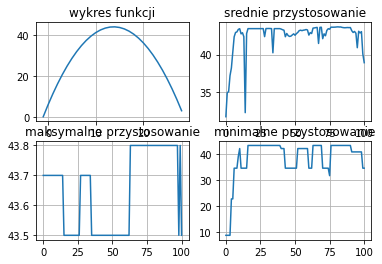

koniec


In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
from time import time
import matplotlib.pyplot as plt

########################
# Algorytmy Genetyczne #
# Zadanie 1            #
# Przemyslaw Pietras   #
########################

# Parametry:
# funkcja dopasowania
fun = lambda x: -0.2 * x ** 2 + 5.5 * x + 6

# liczebność populacji
l = 40

# liczba iteracji
itr = 100

# minimalny x
x_min = -1

# maksymalny x
x_max = 28

# prawdopodobieństwo mutacji
mut_prob = 0.005

# prawdopodobieństwo krzyzowania
krzyz_prob = 10


class Populacja:
    def __init__(self, liczba_osobnikow, min_x, max_x, funkcja, p_mutacji, p_krzyzowanie):
        self.offset = abs(min_x) if min_x < 0 else 0
        dlugosc = len(bin(max_x)[2:])
        self.osobniki = [Osobnik(dlugosc, min_x + self.offset, max_x + self.offset) for _ in range(liczba_osobnikow)]
        print([int(_.chromosom, 2) for _ in self.osobniki])
        self.funkcja = funkcja
        self.srednie_przystosowanie = []
        self.minimalne_przystosowanie = []
        self.maksymalne_przystosowanie = []
        self.przystosowanie = self.ocena()
        self.p_mutacji = p_mutacji
        self.p_krzyzowanie = p_krzyzowanie

    def ocena(self):
        tmp = [max(self.funkcja(int(osobnik.chromosom, 2)) - self.offset, 0) for osobnik in self.osobniki]
        calkowite_przystosowanie = sum(tmp)
        self.srednie_przystosowanie.append(calkowite_przystosowanie / len(self.osobniki))
        self.maksymalne_przystosowanie.append(max(tmp))
        self.minimalne_przystosowanie.append(min([t for t in tmp if t > 0]))
        return [wynik / calkowite_przystosowanie for wynik in tmp]

    def selekcja(self):
        return np.random.choice(self.osobniki, size=len(self.osobniki), replace=True, p=self.przystosowanie)

    def krzyzowanie(self):
        tmp = np.random.permutation(self.selekcja())
        return list(np.array([v * w if np.random.randint(0, 100) < self.p_krzyzowanie
                              else [v, w] for v, w in zip(tmp[::2], tmp[1::2])]).flat)

    def mutacja(self):
        for osobnik in self.osobniki:
            if not np.random.randint(0, int(1 / self.p_mutacji)):
                osobnik.mutuj()

    def nastepna_generacja(self):
        self.osobniki = self.krzyzowanie()
        self.mutacja()
        self.przystosowanie = self.ocena()

    def symulacja(self, iteracji):
        start_time = time()
        for i in range(iteracji):
            self.nastepna_generacja()
        end_time = time()

        print([int(_.chromosom, 2) - self.offset for _ in self.osobniki])

        print('time elapsed:', end_time - start_time)

    def najlepszy_osobnik(self):
        tmp = [max(self.funkcja(int(osobnik.chromosom, 2) - self.offset), 0) for osobnik in self.osobniki]
        return self.osobniki[tmp.index(max(tmp))]


class Osobnik:
    mutacji = 0

    def __init__(self, dlugosc=0, min_x=0, max_x=0, chromosom=None):
        self.chromosom = chromosom if chromosom else bin(np.random.randint(min_x, max_x))[2:].zfill(dlugosc)
        self.dlugosc = len(chromosom) if chromosom else dlugosc

    def __mul__(self, other):
        k = np.random.randint(0, self.dlugosc - 1)
        return [Osobnik(chromosom=self.chromosom[:k] + other.chromosom[k:]),
                Osobnik(chromosom=other.chromosom[:k] + self.chromosom[k:])]

    def mutuj(self):
        Osobnik.mutacji += 1
        k = np.random.randint(0, self.dlugosc)
        print(self.chromosom, k)
        self.chromosom = self.chromosom[:k] + str(int(not bool(int(self.chromosom[k])))) + self.chromosom[k + 1:]
        print(self.chromosom)


p = Populacja(l, 0, x_max, fun, mut_prob, krzyz_prob)
p.symulacja(itr)
print(int(p.najlepszy_osobnik().chromosom, 2))
print('mutacji', Osobnik.mutacji)


# rysowanie wykresów
# wykres funkcji
plt.subplot(221)
plt.plot(range(-1, 29), [-0.2 * x ** 2 + 5.5 * x + 6 for x in range(-1, 29)])
plt.title('wykres funkcji')
plt.grid(b=True)

# średnie przystosowanie
plt.subplot(222)
plt.plot(list(range(itr + 1)), p.srednie_przystosowanie)
plt.title('srednie przystosowanie')
plt.grid(b=True)

# maksymalne przystosowanie
plt.subplot(223)
plt.plot(list(range(itr + 1)), p.maksymalne_przystosowanie)
plt.title('maksymalne przystosowanie')
plt.grid(b=True)

# minimalne przystosowanie
plt.subplot(224)
plt.plot(list(range(itr + 1)), p.minimalne_przystosowanie)
plt.title('minimalne przystosowanie')
plt.grid(b=True)

mng = plt.get_current_fig_manager()
plt.show()
print('koniec')